# Name : ABDURRAHMAN

## The Sparks Foundation - Data Science & Analytics Internship

## Task_1 - Prediction using Supervised Machine Learning

### Description of the task1:-

**Predict the percentage of marks of an student based on the number of study hours**

**This is a simple linear regression task as it involves just 2 variables**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("data.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Higher Level Analysis

In [2]:
df.shape

(25, 2)

In [3]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Univariate Analysis

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


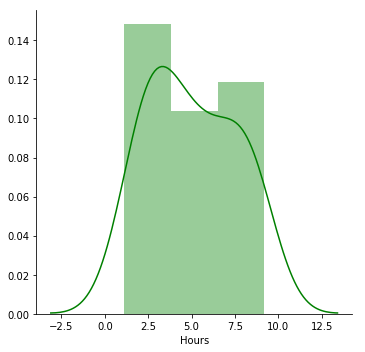

In [5]:
sns.FacetGrid(df,size=5).map(sns.distplot,'Hours',color='Green').add_legend()
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


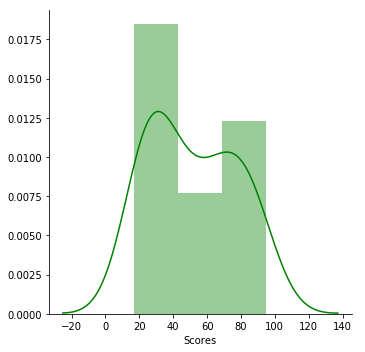

In [6]:
sns.FacetGrid(df,size=5).map(sns.distplot,'Scores',color='Green').add_legend()
plt.show()

**We see that data is fairly normally distributed**

## Bivariate Analysis

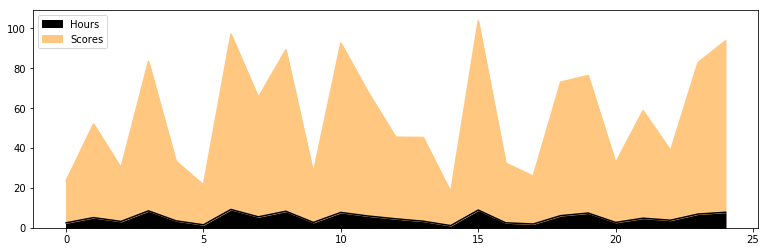

In [7]:
df.plot(kind='area', colormap= 'copper', figsize=(13, 4) ) ;

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


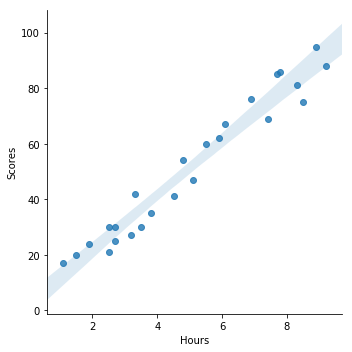

In [8]:
sns.lmplot(x='Hours',y='Scores',data=df)

**From the graph above, we can see that there is a positive linear relation between the number of hours studied and percentage of score.**

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


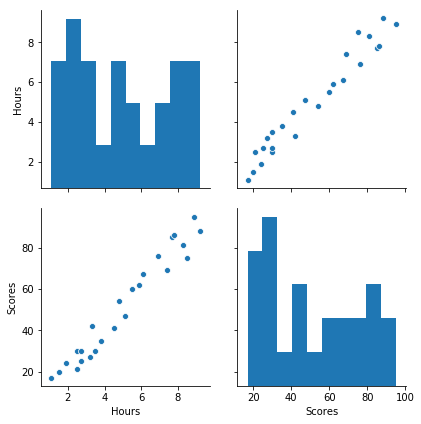

In [9]:
sns.pairplot(df,size=3)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


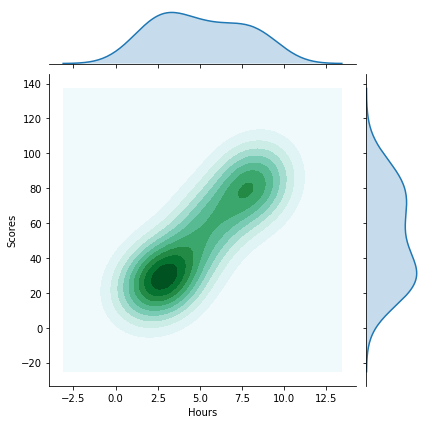

In [10]:
sns.jointplot(x='Hours',y='Scores',data=df, kind='kde',cmap='BuGn')

**Through KDE plot we see that the probability distribution and where most of the data lies**

## Statisitcal analysis (Correlation Coefficient)

In [11]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Scores'], df['Hours'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9761906560220887  with a P-value of P = 9.132624467459352e-17


**0.97 tells us that there is very strong correlation**

## Train Test Split
## ---------------------

In [12]:
from sklearn.model_selection import train_test_split
y = df.Scores
X = df.drop(['Scores'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size = 0.2, random_state = 21)

**Fitting the data and using Linear Regression**

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

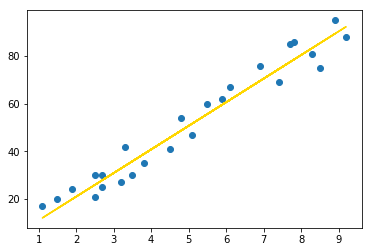

In [14]:
line = lm.coef_*X + lm.intercept_
plt.scatter(X, y)
plt.plot(X, line, color='Gold');
plt.show()

In [15]:
y_pred = lm.predict(X_test)
y_pred

array([51.65813792, 61.56771655, 33.8208964 , 15.98365488, 55.62196937])

In [16]:
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
actual_vs_predicted

,Actual,Predicted
1,47,51.658138
18,67,61.567717
13,42,33.820896
5,20,15.983655
7,60,55.621969


In [17]:
print('Train accuracy: ',lm.score(X_train,y_train),'\nTest accuracy :', lm.score(X_test,y_test))

Train accuracy:  0.9580528702953371 
Test accuracy : 0.8840309431657934


C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


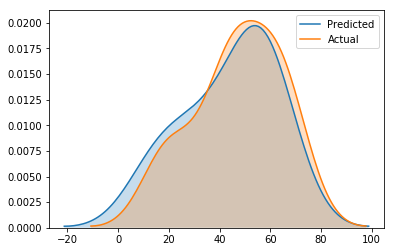

In [18]:
sns.kdeplot(y_pred,label="Predicted",shade='True');
sns.kdeplot(data=y_test,label="Actual",shade='True' );

## Prediction for 9.25 hours of study

In [19]:
hours = 9.25
hours = np.array([[hours]],)
new_pred = lm.predict(hours)

print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(new_pred[0]))

No of Hours = 9.25
Predicted Score = 92.78288920986309


## Model Evalaution
## ------------------------

In [20]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, mean_absolute_error, mean_squared_error, r2_score


print('MAE: ',mean_absolute_error(y_test, y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2: ',r2_score(y_test, y_pred)*100)


MAE:  5.332780144143608
RMSE:  5.539022808768499
R2:  88.40309431657934


**R2  value is approximately 88 which means the model is good as higher the r2 value the better is our model**

**MAE is approximately 5 which is low, this implies a good model as the error should be less**

**RMSE is approximately 5 which is low, this implies a good model as the error should be less**

# Regularization
# ---------------------

## Ridge Regression

In [21]:
alpha_range = 10.**np.arange(-2, 3)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [22]:
# select the best alpha with RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

0.01

In [23]:
y_pred = ridgeregcv.predict(X_test)
print("R2",r2_score(y_test,y_pred))
print ("MAE :",metrics.mean_absolute_error(y_test, y_pred))
print ("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 0.8873939101580547
MAE : 5.248990241726044
RMSE :  5.458119376542167


## Lasso Regression (Regularization)

In [24]:
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
print('alpha : ',lassoregcv.alpha_)

alpha :  0.03302841045254507


In [25]:
y_pred = lassoregcv.predict(X_test)
print("R2",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 0.8860067665215012
mean_absolute_error : 5.284353004738577
root_mean_squared_error :  5.491634533458289


**We see that even after regularization there is very less difference between error. Therefore, now if we want to make a more perfect model we can perform feature engineering to increase the accuracy and fit the model**